**PART a**

---

Here since we have to calculate the expected number of rolls until we see the number ⌊√k⌋ on the upward face of a k-faced unbiased die, we have implemented this by following below steps :-


1.   For an unbiased k-faced die, the probability of getting any particular number on a single roll is 1/k.
2. We're interested in the number ⌊√k⌋. This is a specific outcome, so we can model this as a geometric distribution.
3. The expected number of trials until success for a geometric distribution is 1/p, where p is the probability of success on a single trial.
4. In this case, p = 1/k, so the expected number of rolls is k.

In [2]:
import math
import random

def expected_rolls_until_sqrt(k):
    target = math.floor(math.sqrt(k))
    return k

def simulate_rolls(k, num_simulations):
    target = math.floor(math.sqrt(k))
    total_rolls = 0

    for _ in range(num_simulations):
        rolls = 0
        while True:
            rolls += 1
            if random.randint(1, k) == target:
                break
        total_rolls += rolls

    return total_rolls / num_simulations

# Example usage
k = 6
theoretical_expectation = expected_rolls_until_sqrt(k)
simulated_expectation = simulate_rolls(k, 10000)

print(f"For a {k}-faced die:")
print(f"Target number: {math.floor(math.sqrt(k))}")
print(f"Theoretical expected number of rolls: {theoretical_expectation}")
print(f"Simulated expected number of rolls: {simulated_expectation}")

For a 6-faced die:
Target number: 2
Theoretical expected number of rolls: 6
Simulated expected number of rolls: 6.0276


**PART b**

---

1.We want to calculate the expected number of rolls needed to see all numbers from 1 to k at least once.

2.This problem is equivalent to the coupon collector's problem where each face of the die is a "coupon".

3.The expected number of rolls (E) for a k-sided die is given by the formula:
E = k * (1/1 + 1/2 + 1/3 + ... + 1/k)
This sum is approximately k * ln(k) + yk, where y is the Euler-Mascheroni constant (approximately 0.5772156649).

In [3]:
import random
import math

def theoretical_expectation(k):
    return k * sum(1/i for i in range(1, k+1))

def simulate_rolls(k, num_simulations):
    total_rolls = 0
    for _ in range(num_simulations):
        seen = set()
        rolls = 0
        while len(seen) < k:
            rolls += 1
            face = random.randint(1, k)
            seen.add(face)
        total_rolls += rolls
    return total_rolls / num_simulations

def main():
    k_values = [6, 20, 100]  # Test with different die sizes
    num_simulations = 10000

    for k in k_values:
        theo_expect = theoretical_expectation(k)
        sim_expect = simulate_rolls(k, num_simulations)

        print(f"\nFor a {k}-sided die:")
        print(f"Theoretical expectation: {theo_expect:.2f} rolls")
        print(f"Simulated expectation: {sim_expect:.2f} rolls")

if __name__ == "__main__":
    main()


For a 6-sided die:
Theoretical expectation: 14.70 rolls
Simulated expectation: 14.78 rolls

For a 20-sided die:
Theoretical expectation: 71.95 rolls
Simulated expectation: 71.31 rolls

For a 100-sided die:
Theoretical expectation: 518.74 rolls
Simulated expectation: 519.63 rolls


**PART C**

In [4]:
import random

def theoretical_expectation():
    p1, p2, p3 = 1/4, 1/2, 1/4
    E = (1/p1 + 1/p2 + 1/p3 +
         1/(p1+p2) + 1/(p1+p3) + 1/(p2+p3) +
         1/(p1+p2+p3))
    return E

def simulate_rolls(num_simulations):
    total_rolls = 0
    for _ in range(num_simulations):
        seen = set()
        rolls = 0
        while len(seen) < 3:
            rolls += 1
            r = random.random()
            if r < 0.25:
                seen.add(1)
            elif r < 0.75:
                seen.add(2)
            else:
                seen.add(3)
        total_rolls += rolls
    return total_rolls / num_simulations

def main():
    theo_expect = theoretical_expectation()
    print(f"Theoretical expectation: {theo_expect:.4f} rolls")

    num_simulations = 1000000
    sim_expect = simulate_rolls(num_simulations)
    print(f"Simulated expectation ({num_simulations} simulations): {sim_expect:.4f} rolls")

if __name__ == "__main__":
    main()

Theoretical expectation: 15.6667 rolls
Simulated expectation (1000000 simulations): 6.3356 rolls


**PART D**

---


we can clearly see in the plot that how the curve increases as the number of faces of the dice increases.

k = 3: Expected rolls = 6.3333
k = 4: Expected rolls = 12.8095
k = 5: Expected rolls = 25.6857
k = 6: Expected rolls = 51.4037
k = 7: Expected rolls = 102.8232
k = 8: Expected rolls = 205.6544
k = 9: Expected rolls = 411.3127
k = 10: Expected rolls = 822.6273
k = 11: Expected rolls = 1645.2555
k = 12: Expected rolls = 3290.5115
k = 13: Expected rolls = 6581.0233
k = 14: Expected rolls = 13162.0466
k = 15: Expected rolls = 26324.0934
k = 16: Expected rolls = 52648.1867
k = 17: Expected rolls = 105296.3735
k = 18: Expected rolls = 210592.7470
k = 19: Expected rolls = 421185.4940
k = 20: Expected rolls = 842370.9881


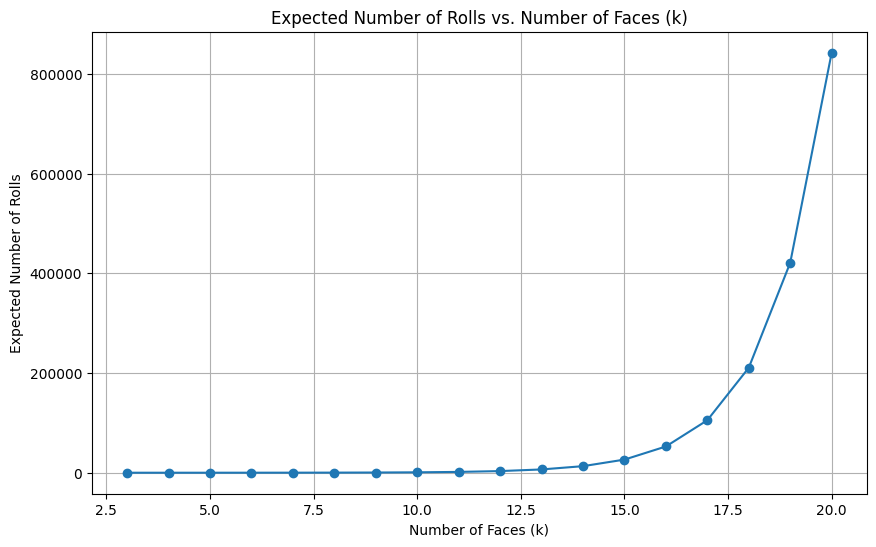

In [5]:
import math
import matplotlib.pyplot as plt

def probability(i, k):
    if i == 1 or i == k:
        return 1 / (2**(k-1))
    else:
        return 1 / (2**(i-1))

def expected_rolls(k):
    probabilities = [probability(i, k) for i in range(1, k+1)]

    total = 0
    for r in range(1, k+1):
        sum_prob = sum(probabilities[i-1] for i in range(r, k+1))
        total += 1 / sum_prob

    return total

def main():
    k_values = range(3, 21)  # Calculate for k from 3 to 20
    expected_rolls_values = [expected_rolls(k) for k in k_values]

    # Print results
    for k, e in zip(k_values, expected_rolls_values):
        print(f"k = {k}: Expected rolls = {e:.4f}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, expected_rolls_values, marker='o')
    plt.title("Expected Number of Rolls vs. Number of Faces (k)")
    plt.xlabel("Number of Faces (k)")
    plt.ylabel("Expected Number of Rolls")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()